In [67]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
df = city_df.merge(ride_df,on='city',how='outer')
# Display the data table for preview
df = df.sort_values(by='city')
df.head()

,city,driver_count,type,date,fare,ride_id
1523,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
1522,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
1529,Amandaburgh,12,Urban,2018-03-13 12:52:31,13.88,6222134922674
1524,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492
1525,Amandaburgh,12,Urban,2018-04-19 16:30:12,6.27,4400632718421


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [220]:
# Obtain the x and y coordinates for each of the three city types
rides_per_city = df['city'].value_counts()
newdf = pd.DataFrame(rides_per_city)
newdf = newdf.rename(columns={'city':"total rides"})

newdf = newdf.reset_index()
newdf = newdf.rename(columns={"index":"city"})

testdf = newdf.merge(df,on='city',how='inner')
testdf = testdf.drop(['date','ride_id'],axis=1)
testdf = testdf.sort_values(by='city')

average_fares = testdf.groupby('city')['fare'].mean()
avg_fares = pd.DataFrame(average_fares)
avg_fares = avg_fares.rename(columns={'fare':'avg fare'})
avg_fares.reset_index()
testdf = testdf.merge(avg_fares,on="city",how="inner")
testdf = testdf.drop('fare',axis=1)
testdf = testdf.drop_duplicates(['city'])
testdf = testdf.sort_values('type')
testdf = testdf.set_index('city')

total_rides = testdf['total rides'].values
city_type = testdf['type'].values
driver_count = testdf['driver_count'].values
avg_fare = testdf['avg fare'].values
new_df = pd.DataFrame({"Type":city_type,"Total Rides":total_rides,"Driver Count":driver_count,
                      "Average Fare":avg_fare})
new_df.head()

,Type,Total Rides,Driver Count,Average Fare
0,Rural,6,1,42.263333
1,Rural,4,1,36.745000
2,Rural,6,2,43.278333
3,Rural,7,7,35.264286
4,Rural,8,1,41.870000


In [335]:
r_x = []
r_y = []
r_z = []
s_x = []
s_y = []
s_z = []
u_x = []
u_y = []
u_z = []
n = len(new_df)

for x in range(n):
    if new_df['Type'][x] == "Rural":
        r_x.append(new_df['Total Rides'][x])

for x in range(n):
    if new_df['Type'][x] == "Suburban":
        s_x.append(new_df['Total Rides'][x])

for x in range(n):
    if new_df['Type'][x] == "Urban":
        u_x.append(new_df['Total Rides'][x])
        
for x in range(n):
    if new_df['Type'][x] == "Rural":
        r_y.append(new_df['Average Fare'][x])

for x in range(n):
    if new_df['Type'][x] == "Suburban":
        s_y.append(new_df['Average Fare'][x])

for x in range(n):
    if new_df['Type'][x] == "Urban":
        u_y.append(new_df['Average Fare'][x])
        
for x in range(n):
    if new_df['Type'][x] == "Rural":
        r_z.append((new_df['Driver Count'][x])*10)

for x in range(n):
    if new_df['Type'][x] == "Suburban":
        s_z.append((new_df['Driver Count'][x])*10)

for x in range(n):
    if new_df['Type'][x] == "Urban":
        u_z.append((new_df['Driver Count'][x])*10)

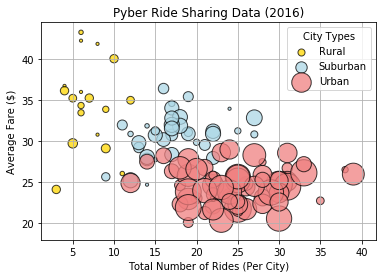

In [357]:
# Build the scatter plots for each city types
plt.scatter(r_x,r_y,marker = "o",facecolors='gold',edgecolors = "black",s=r_z,alpha=.75)
plt.scatter(s_x,s_y,marker = "o",facecolors='lightblue',edgecolors = "black",s=s_z,alpha=.75)
plt.scatter(u_x,u_y,marker = "o",facecolors='lightcoral',edgecolors = "black",s=u_z,alpha=.75)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
# Create a legend
lgnd = plt.legend(["Rural","Suburban","Urban"],title="City Types")
# Incorporate a text label regarding circle size

# Save Figure


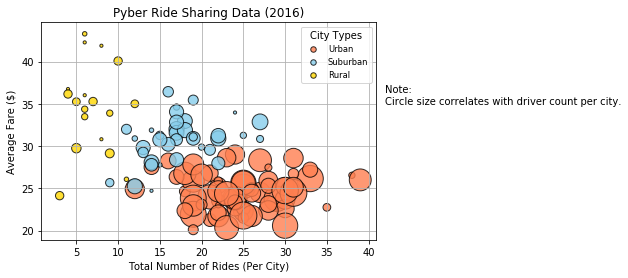

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

Text(0.5,1,'% of Total Fares by City Type')

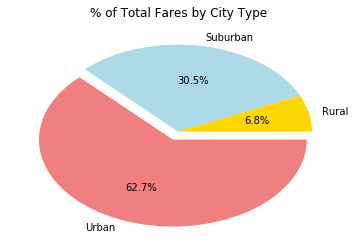

In [319]:
# Calculate Type Percents
fare_df = df.groupby(['type'])['fare'].sum()
fare_df = pd.DataFrame(fare_df)
fare_df

total_fares = fare_df['fare'].sum()

rural_fare_prct = (fare_df['fare']['Rural']) / total_fares
suburban_fare_prct = (fare_df['fare']['Suburban']) / total_fares
urban_fare_prct = (fare_df['fare']['Urban']) / total_fares

fare_percents = [rural_fare_prct,suburban_fare_prct,urban_fare_prct]
labels = ['Rural','Suburban','Urban']
explode = [0,0,.10]
colors = ["gold","lightblue","lightcoral"]
# Build Pie Chart
plt.pie(fare_percents,explode=explode,labels=labels,autopct="%1.1f%%",colors=colors)
plt.title("% of Total Fares by City Type")
# Save Figure


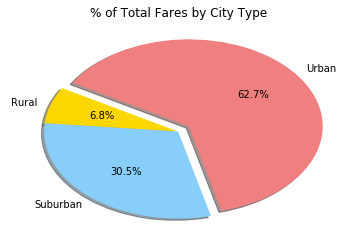

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

Text(0.5,1,'% of Total Rides by City Type')

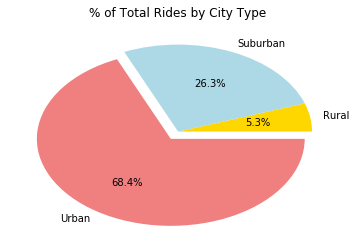

In [318]:
# Calculate Ride Percents
total_rides = new_df['Total Rides'].sum()
total_rides

rides_df = pd.DataFrame(new_df.groupby(['Type'])['Total Rides'].sum())
rides_df

rural_ride_prct = rides_df['Total Rides']['Rural'] / total_rides
suburban_ride_prct = rides_df['Total Rides']['Suburban'] / total_rides
urban_ride_prct = rides_df['Total Rides']['Urban'] / total_rides

ride_percents = [rural_ride_prct,suburban_ride_prct,urban_ride_prct]
# Build Pie Chart
plt.pie(ride_percents,explode=explode,labels=labels,autopct="%1.1f%%",colors=colors)
plt.title("% of Total Rides by City Type")
# Save Figure


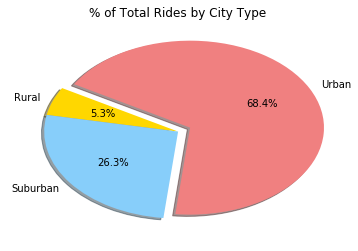

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

Text(0.5,1,'% of Total Drivers by City Type')

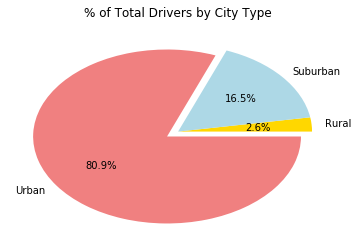

In [317]:
# Calculate Driver Percents
total_drivers = new_df['Driver Count'].sum()
total_drivers

total_driver_df = pd.DataFrame(new_df.groupby(['Type'])['Driver Count'].sum())
total_driver_df

rural_driver_prct = total_driver_df['Driver Count']['Rural'] / total_drivers
suburban_driver_prct = total_driver_df['Driver Count']['Suburban'] / total_drivers
urban_driver_prct = total_driver_df['Driver Count']['Urban'] / total_drivers

driver_percents = [rural_driver_prct,suburban_driver_prct,urban_driver_prct]
# Build Pie Charts
plt.pie(driver_percents,explode=explode,labels=labels,autopct="%1.1f%%",colors=colors)
plt.title("% of Total Drivers by City Type")
# Save Figure


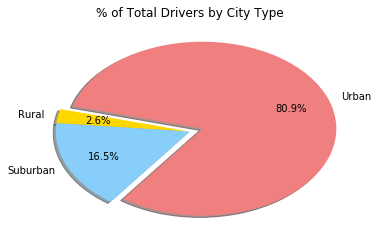

In [6]:
# Show Figure
plt.show()